In [1]:
!git clone https://github.com/naveenkumar12624/Datasets.git

Cloning into 'Datasets'...
remote: Enumerating objects: 18913, done.
remote: Total 18913 (delta 0), reused 0 (delta 0), pack-reused 18913
Receiving objects: 100% (18913/18913), 2.21 GiB | 51.35 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (18911/18911), done.


In [2]:
%cd Datasets

/home/jovyan/Datasets


In [3]:
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [6]:
image_directory = '/home/jovyan/Datasets'


In [10]:
image_size = (128, 128)
batch_size = 128

In [12]:
# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to the range [0, 1]
    rotation_range=20,  # Randomly rotate images within ±20 degrees
    width_shift_range=0.2,  # Randomly shift the width of images
    height_shift_range=0.2,  # Randomly shift the height of images
    shear_range=0.2,  # Apply shear transformation
    zoom_range=0.2,  # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images horizontally
    validation_split=0.2  # Split data into training and validation sets
)

# Create separate data generators for training and validation
train_generator = datagen.flow_from_directory(
    image_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Assuming skin diseases are classified
    shuffle=True,
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    image_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

# Define and compile the deep learning model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))
batch_size = 64
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])



Found 15133 images belonging to 18 classes.
Found 3778 images belonging to 18 classes.


In [13]:
# Train the model
epochs = 18  # Adjust the number of epochs as needed
history = model.fit(train_generator, validation_data=validation_generator, epochs=epochs)


Epoch 1/18
237/237 [==============================] - 777s 3s/step - loss: 1.0095 - accuracy: 0.7090 - val_loss: 1.0535 - val_accuracy: 0.6768
Epoch 2/18
237/237 [==============================] - 742s 3s/step - loss: 0.8745 - accuracy: 0.7258 - val_loss: 1.0065 - val_accuracy: 0.6832
Epoch 3/18
237/237 [==============================] - 743s 3s/step - loss: 0.8265 - accuracy: 0.7326 - val_loss: 0.9504 - val_accuracy: 0.6914
Epoch 4/18
237/237 [==============================] - 703s 3s/step - loss: 0.7938 - accuracy: 0.7387 - val_loss: 0.9694 - val_accuracy: 0.6975
Epoch 5/18
237/237 [==============================] - 734s 3s/step - loss: 0.7688 - accuracy: 0.7481 - val_loss: 0.9842 - val_accuracy: 0.6945
Epoch 6/18
237/237 [==============================] - 800s 3s/step - loss: 0.7617 - accuracy: 0.7471 - val_loss: 0.9700 - val_accuracy: 0.6985
Epoch 7/18
237/237 [==============================] - 719s 3s/step - loss: 0.7511 - accuracy: 0.7537 - val_loss: 0.9887 - val_accuracy: 0.6967

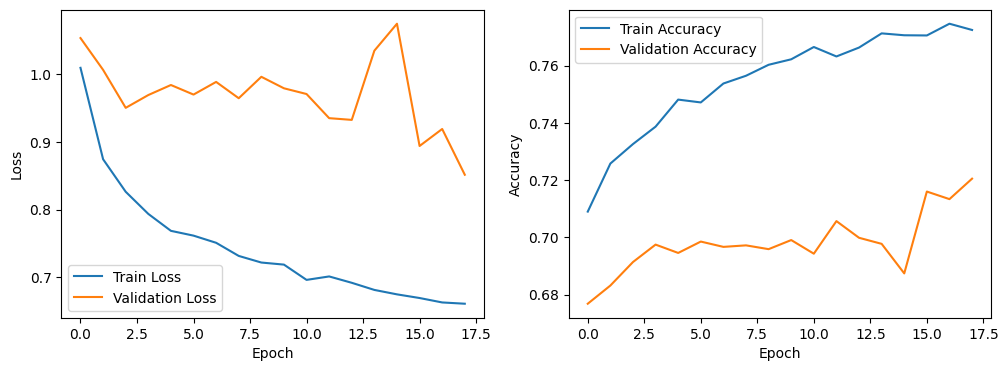

In [15]:
# Plot the training and validation metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [28]:
image_path = "/home/jovyan/Datasets/acne-on-face-1326434308-770x533-1.jpg"

In [29]:
user_input_image = keras.preprocessing.image.load_img(image_path, target_size=image_size)
user_input_image = keras.preprocessing.image.img_to_array(user_input_image) / 255.0
user_input_image = np.expand_dims(user_input_image, axis=0)

# Make a prediction
prediction = model.predict(user_input_image)
class_index = np.argmax(prediction)

# Extract the class labels from class_indices
class_labels = list(train_generator.class_indices.keys())

# Access the predicted class label
disease_label = class_labels[class_index]

# Calculate the accuracy as a percentage
accuracy_percentage = prediction[0][class_index] * 100

# Display the predicted disease, accuracy, and other disease probabilities
print(f"The predicted disease may be {disease_label}")
print(f"By the User Given Image,the Prediction Accuracy is: {accuracy_percentage:.2f}%\n")

# Display the probabilities of other diseases
for i, label in enumerate(class_labels):
    probability = prediction[0][i] * 100
    print(f"Also the Probability of {label}: {probability:.2f}%")





1/1 [==============================] - 1s 644ms/step
The predicted disease may be Acne
By the User Given Image,the Prediction Accuracy is: 96.54%

Also the Probability of .git: 0.00%
Also the Probability of Acne: 96.54%
Also the Probability of actinic keratosis: 0.15%
Also the Probability of atypical melanocytic proliferation: 0.00%
Also the Probability of basal cell carcinoma: 0.19%
Also the Probability of cafe-au-lait macule: 0.00%
Also the Probability of dermatofibroma: 0.01%
Also the Probability of lentigo NOS: 0.01%
Also the Probability of lichenoid keratosis: 0.02%
Also the Probability of melanoma: 1.94%
Also the Probability of nevus: 0.18%
Also the Probability of other: 0.00%
Also the Probability of pigmented benign keratosis: 0.01%
Also the Probability of scar: 0.00%
Also the Probability of seborrheic keratosis: 0.31%
Also the Probability of solar lentigo: 0.07%
Also the Probability of squamous cell carcinoma: 0.58%
Also the Probability of vascular lesion: 0.00%


In [57]:
from IPython.display import HTML

with open('/home/jovyan/SkinDiseasePredictor/upload.html', 'r') as file:
    html_content = file.read()

display(HTML(html_content))


TypeError: 'module' object is not callable

In [30]:
model.save("your_model.h5")